In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

sns.set_style("whitegrid")

In [3]:
PATH_ROOT=Path("../").resolve()
PATH_ROOT

PosixPath('/data/horse/ws/s4610340-superconduct/superconduct-tc-reg')

### First view

In [4]:
df = pd.read_csv(PATH_ROOT/"data/raw/superconductivity_data/train.csv")
with pd.option_context('display.max_columns', 82):
    display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.837500,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.

In [5]:
with pd.option_context('display.max_columns', 82):
    display(df.describe(percentiles=[.05, .25, .5, .75, .95]))

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620

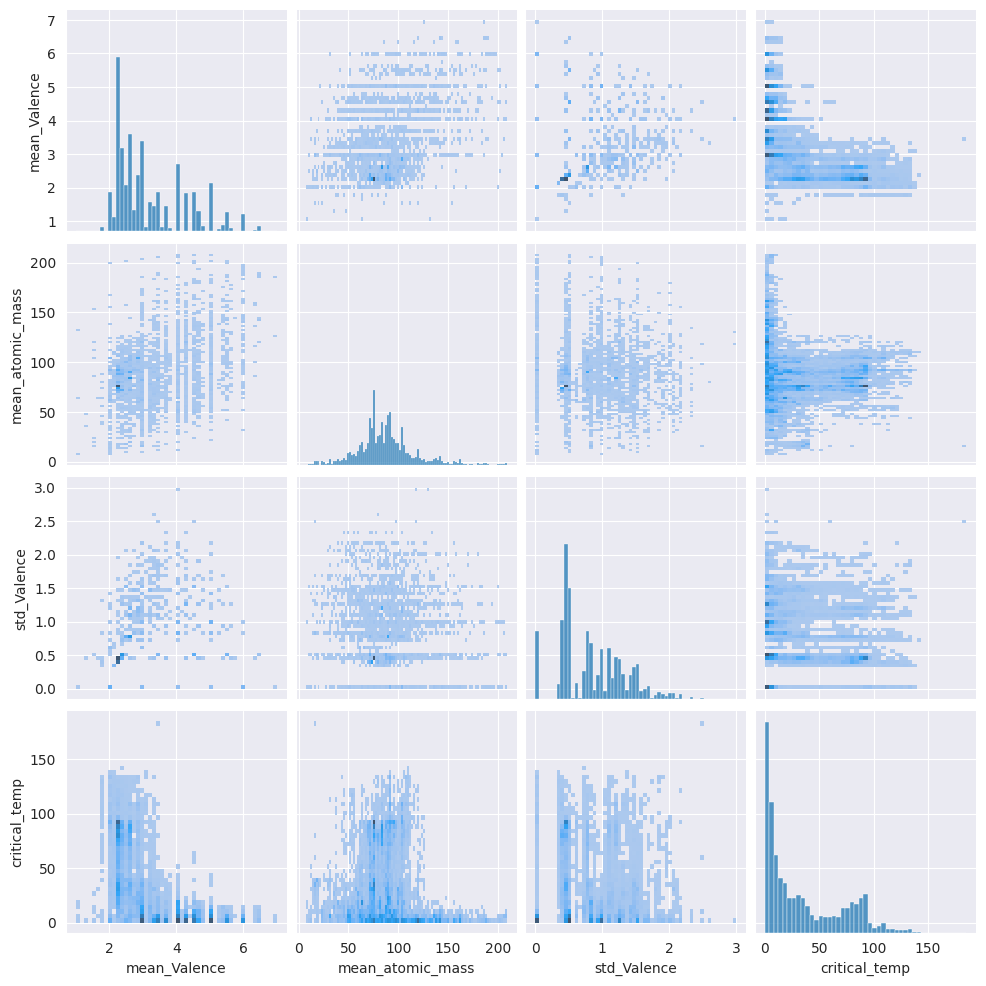

In [6]:
sns.pairplot(df[pd.Series(df.columns).sample(3).to_list() + ["critical_temp"]], kind="hist")

### Check NaNs

In [7]:
df.columns[df.isna().any()]

Index([], dtype='object')

There are no missing values in the dataset.

### Correlation analysis

In [8]:
from IPython.display import Markdown

def get_high_corr_pairs(df, threshold=0.8):
    """
    Function to select feature pairs with absolute correlation higher than a threshold.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the dataset
    threshold (float): The correlation threshold (default is 0.8)
    
    Returns:
    pd.DataFrame: DataFrame with feature pairs and their correlation values
    """
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Get the absolute values of the correlation matrix
    corr_abs = correlation_matrix.abs()

    # Create a mask to keep only the upper triangle, excluding the diagonal
    mask = np.triu(np.ones(corr_abs.shape), k=1).astype(bool)

    # Apply the mask to the correlation matrix
    corr_filtered = corr_abs.where(mask)

    # Select pairs with abs(correlation) greater than the threshold
    high_corr_pairs = corr_filtered.stack().reset_index()
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Filter pairs based on the threshold
    high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

    # Sort the pairs by correlation value (optional)
    high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

    return high_corr_pairs.set_index(["Feature 1", "Feature 2"]).sort_index()

def correlation_analysis(df: pd.DataFrame, method):
    df_orig = df
    if method == "pearson":
        outliers_idx = []
        for column in df.columns:
            q_low = df[column].quantile(0.001)
            q_high = df[column].quantile(0.999)
            df_outliers = df.loc[(df[column] <= q_low) | (df[column] >= q_high)]
            outliers_idx.extend(df_outliers.index.to_list())
        df = df.drop(list(set(outliers_idx)))
        print(f"Removed N={len(df_orig)-len(df)} outliers.")

    corr_matrix = df.corr(method=method)

    ax = sns.heatmap(corr_matrix)
    ax.set_title(f"Correlation matrix ({method})")
    plt.show(ax)

    display(Markdown("##### Correlation with target:"))
    corr_target = corr_matrix.loc["critical_temp"]
    corr_target_sorted = corr_target.sort_values(ascending=False, key=lambda x: abs(x))
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 10):
        display(corr_target_sorted.to_frame().iloc[:30])

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
    for feature, ax in zip(corr_target_sorted.index[1:4], axs):
        im = ax.hexbin(x=df_orig[feature], y=df_orig["critical_temp"], gridsize=10)
        ax.set_title(f"c={corr_target_sorted[feature]:.2f}")
        ax.set_xlabel(feature)
        ax.set_ylabel("critical_temp")
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
    fig.colorbar(im, cax=cbar_ax)
        
    plt.show(fig)

    display(Markdown("##### Highly correlated features:"))
    high_corr_features = get_high_corr_pairs(corr_matrix, threshold=0.95)
    display(high_corr_features.reset_index())
        

    return {
        "cm": corr_matrix,
        "corr_target_sorted" : corr_target_sorted,
        "high_corr_features": high_corr_features
    }

    

#### Using pearson correlation

Removed N=3293 outliers.


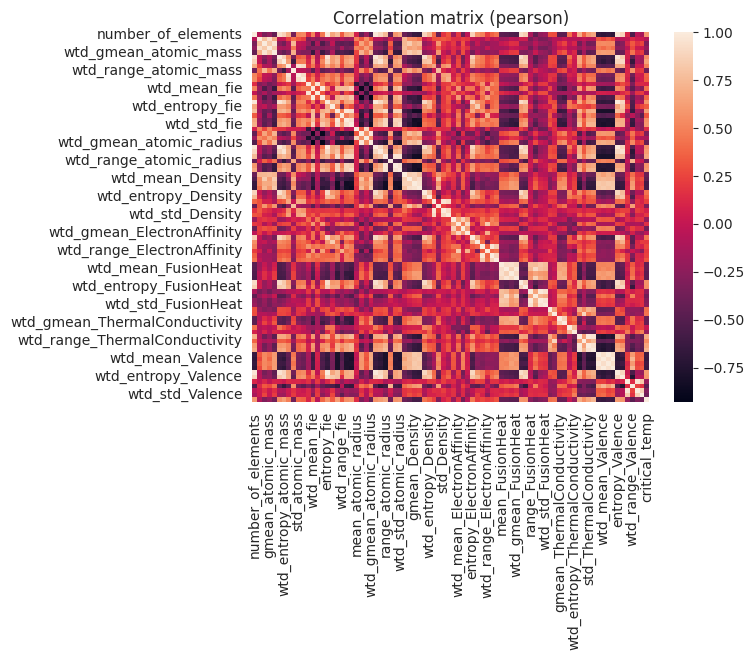

##### Correlation with target:

,critical_temp
critical_temp,1.000000
wtd_std_ThermalConductivity,0.725608
range_ThermalConductivity,0.681178
range_atomic_radius,0.655480
std_ThermalConductivity,0.651155
wtd_mean_Valence,-0.645677
wtd_gmean_Valence,-0.632271
wtd_entropy_atomic_mass,0.625930
mean_Valence,-0.619944
range_fie,0.616303


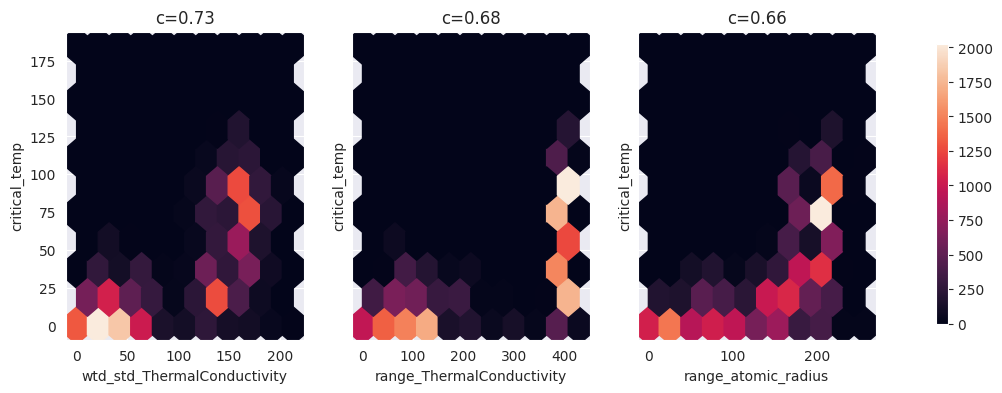

##### Highly correlated features:

,Feature 1,Feature 2,Correlation
0,entropy_Density,entropy_ElectronAffinity,0.972659
1,entropy_Density,entropy_FusionHeat,0.987927
2,entropy_Density,entropy_Valence,0.974464
3,entropy_Density,wtd_entropy_Density,0.962211
4,entropy_Density,wtd_entropy_FusionHeat,0.970365
...,...,...,...
341,wtd_std_fie,wtd_mean_atomic_radius,0.951517
342,wtd_std_fie,wtd_range_Valence,0.953317
343,wtd_std_fie,wtd_range_atomic_radius,0.955001
344,wtd_std_fie,wtd_std_ThermalConductivity,0.958692


In [9]:
_ = correlation_analysis(df=df, method="pearson")

#### Using spearman correlation

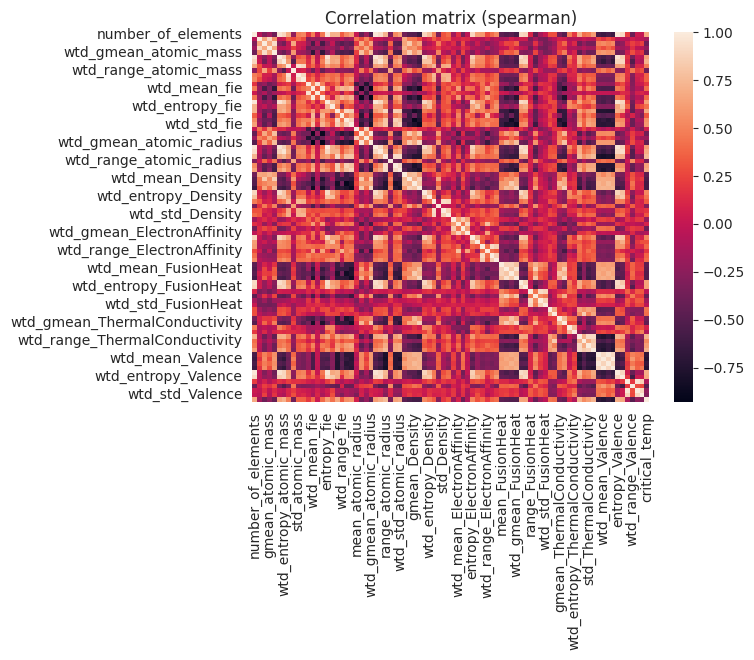

##### Correlation with target:

,critical_temp
critical_temp,1.000000
range_atomic_radius,0.754892
wtd_mean_Valence,-0.736142
wtd_gmean_Valence,-0.736017
range_ThermalConductivity,0.719161
wtd_std_ThermalConductivity,0.711684
wtd_entropy_atomic_mass,0.707374
entropy_Valence,0.691771
wtd_entropy_atomic_radius,0.688222
mean_Valence,-0.686019


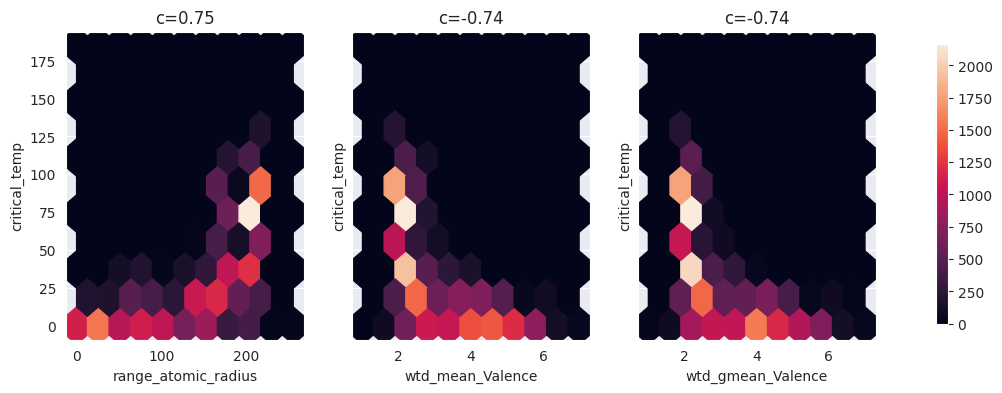

##### Highly correlated features:

,Feature 1,Feature 2,Correlation
0,entropy_Density,entropy_ElectronAffinity,0.967640
1,entropy_Density,entropy_FusionHeat,0.983644
2,entropy_Density,entropy_Valence,0.968592
3,entropy_Density,wtd_entropy_Density,0.960079
4,entropy_Density,wtd_entropy_FusionHeat,0.967711
...,...,...,...
296,wtd_std_fie,wtd_mean_Density,0.965325
297,wtd_std_fie,wtd_mean_FusionHeat,0.974145
298,wtd_std_fie,wtd_mean_Valence,0.961864
299,wtd_std_fie,wtd_mean_atomic_radius,0.958267


In [10]:
_ = correlation_analysis(df=df, method="spearman")

### PCA

#### How many features needed to describe most of the variance

##### On raw dataset

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
features = df.drop("critical_temp", axis=1)
features_scaled = pd.DataFrame(StandardScaler().fit_transform(features), columns=features.columns)
features_scaled

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.080058,0.046733,-0.451651,-0.158850,-0.611819,0.044358,-0.003707,0.133725,-0.053039,0.378186,...,-0.907755,-0.752156,-0.805912,-0.711705,0.186292,0.035183,-0.837959,-0.406166,-0.838372,-0.520070
1,0.614744,0.174269,-0.432071,0.059368,-0.604180,0.777430,-0.015267,0.133725,0.108900,0.134901,...,-1.147084,-0.752156,-1.116731,-0.719454,0.664971,-0.014779,-0.033011,-0.362352,-0.426866,-0.450821
2,-0.080058,0.046733,-0.450978,-0.158850,-0.611658,0.044358,-0.218984,0.133725,0.093294,0.378186,...,-0.907755,-0.740164,-0.805912,-0.700728,0.186292,-0.062235,-0.837959,-0.376957,-0.838372,-0.503304
3,-0.080058,0.046733,-0.451314,-0.158850,-0.611739,0.044358,-0.103615,0.133725,0.020128,0.378186,...,-0.907755,-0.746160,-0.805912,-0.706224,0.186292,-0.010538,-0.837959,-0.391562,-0.838372,-0.511524
4,-0.080058,0.046733,-0.452324,-0.158850,-0.611980,0.044358,0.162775,0.133725,-0.199372,0.378186,...,-0.907755,-0.764149,-0.805912,-0.722618,0.186292,0.113627,-0.837959,-0.435376,-0.838372,-0.538178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-0.080058,0.653740,-0.593991,0.361744,-0.420307,0.031615,0.473913,0.572626,-0.657124,1.066745,...,0.049562,0.337829,0.159787,0.394987,0.208923,-0.366001,-0.837959,0.701200,-0.838372,-0.388706
21259,0.614744,0.158685,-0.715653,-0.208768,-0.700465,0.432089,1.264895,1.332391,-0.959386,1.239871,...,-0.955620,-0.928046,-0.848370,-0.865598,0.759220,0.747878,-0.837959,-0.591160,-0.906487,-1.011981
21260,-1.469660,0.407927,0.675457,0.906983,1.007482,-1.300993,-1.329515,-1.868861,0.734817,-1.878471,...,1.246207,1.382509,1.353046,1.469098,-1.548333,-1.583774,-0.837959,1.755341,-0.700159,-0.601416
21261,-1.469660,0.407927,0.719844,0.906983,1.046684,-1.300993,-1.053776,-1.868861,-0.078244,-1.878471,...,1.246207,1.290167,1.353046,1.370404,-1.548333,-1.249706,-0.837959,0.743230,-0.700159,-0.464240


In [13]:
pca = PCA()
pca.fit(features_scaled)

PCA()

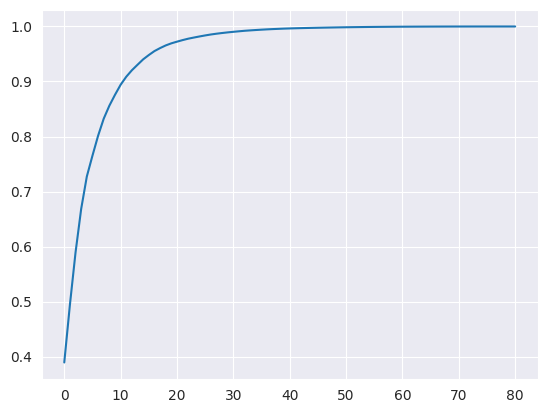

In [14]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [15]:
for i, x in enumerate(pca.explained_variance_ratio_.cumsum()):
    if x >= 0.99:
        print(i, x)
        break

30 0.9902944886036431


99% of the variance is described by the 30 principal components.

In [16]:
df_pca = pd.DataFrame(pca.transform(features_scaled), columns=[f"pc_{i}" for i in range(81)])
df_pca["critical_temp"] = df["critical_temp"]
df_pca

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_72,pc_73,pc_74,pc_75,pc_76,pc_77,pc_78,pc_79,pc_80,critical_temp
0,-3.664487,0.991643,3.045260,1.713725,0.469509,-0.377614,-0.315111,-0.123208,0.067451,0.684996,...,-1.765016,-0.489100,-0.914585,0.039965,-0.561759,-0.343803,-0.492077,1.294449,0.038292,29.00
1,-4.555468,-0.214585,1.722873,1.111493,0.642424,-0.623723,-0.379548,-0.102526,0.037699,0.524748,...,-1.821123,-0.498388,-1.008284,0.202357,-0.552553,-0.408664,-0.457313,1.306867,0.147891,26.00
2,-3.488176,1.055167,3.130821,1.811590,0.133225,-0.093645,-0.403679,0.152293,0.051961,0.537257,...,0.284310,-0.694200,-0.822725,0.077959,-0.493808,-0.221110,-0.473287,0.842655,0.255056,19.00
3,-3.581284,1.020144,3.084663,1.760859,-0.060851,-0.036481,-0.218975,0.192726,-0.068288,0.680935,...,0.159846,-0.694769,-0.939581,-0.085087,-0.211716,-0.301359,-0.436971,0.483167,0.168106,22.00
4,-3.809671,0.948297,2.981358,1.627398,0.017713,0.212319,0.543464,-0.392942,-0.274384,-0.090493,...,0.711989,-0.630232,-0.818303,-0.197821,-0.679906,0.286956,-0.248995,0.627831,0.284525,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.143727,-2.005240,0.786006,-0.883304,-0.006359,-1.157055,0.456660,-0.498454,-1.476266,-0.481351,...,-0.988007,0.378270,-1.734915,-0.146087,-0.561666,0.000360,0.036880,0.000407,-0.012243,2.44
21259,-1.349176,-0.285752,-0.706143,-0.367927,0.626535,-2.344767,-0.671536,-0.041097,-0.391195,0.115179,...,0.349127,0.834290,-0.383855,0.941017,1.168096,-0.184851,0.006237,-0.000998,-0.001181,122.10
21260,-1.954006,-1.863365,0.859127,-0.402272,0.990354,-1.296698,-0.887309,-0.544623,-0.844205,-0.965604,...,-1.501660,0.203662,0.104402,0.898806,1.119957,-0.398954,0.003719,0.007787,0.001225,1.98
21261,9.771885,-1.001345,1.215602,-0.872021,-0.954733,-0.674221,-0.754652,-1.624888,0.146395,-0.065916,...,0.003559,0.004636,-0.009418,-0.002175,0.009862,0.009411,-0.005655,0.008243,0.002287,1.84


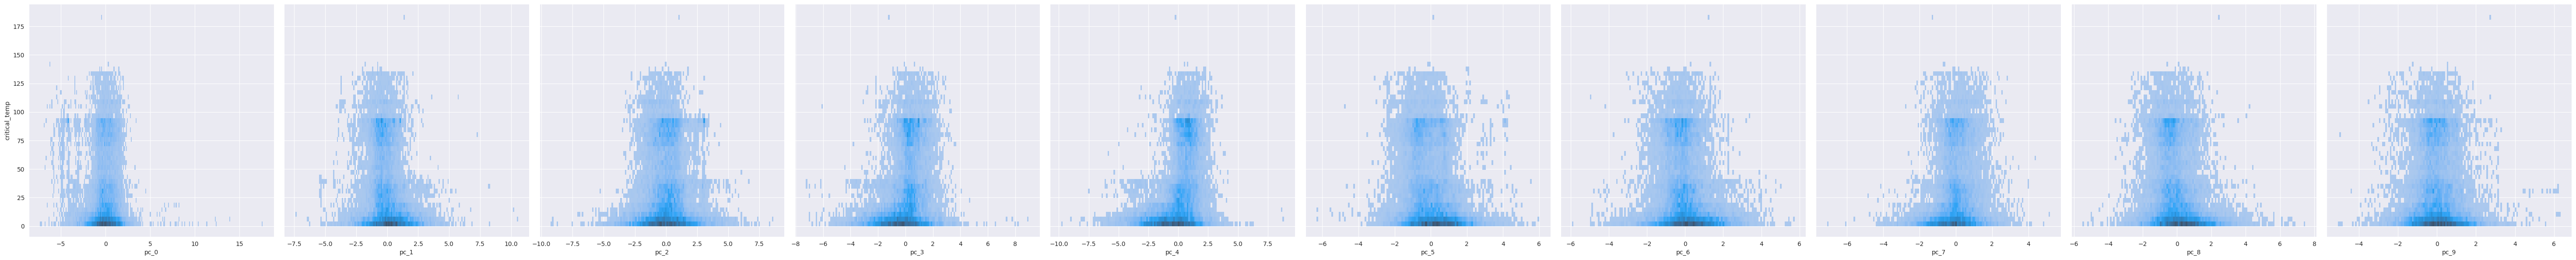

In [17]:
sns.pairplot(df_pca, x_vars=[f"pc_{i}" for i in range(10)], y_vars=["critical_temp"], height=6, aspect=1, kind="hist")

##### With highly correlated features removed

In [23]:
def remove_highly_correlated_features(df, threshold=0.9, method: str="pearson"):
    """
    Removes highly correlated features from a dataset.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop the highly correlated features
    df_dropped = df.drop(columns=to_drop)

    return df_dropped

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,-0.080058,0.046733,-0.451651,-0.158850,0.044358,-0.003707,0.133725,-0.053039,0.609240,0.066413,...,-0.663995,-1.286879,-0.870857,0.939383,-0.113755,-0.907755,-0.752156,-0.837959,-0.406166,-0.520070
1,0.614744,0.174269,-0.432071,0.059368,0.777430,-0.015267,0.133725,0.108900,0.627122,-0.036288,...,-0.664051,0.367440,0.087089,1.128420,-0.246269,-1.147084,-0.752156,-0.033011,-0.362352,-0.450821
2,-0.080058,0.046733,-0.450978,-0.158850,0.044358,-0.218984,0.133725,0.093294,0.610928,0.066413,...,-0.664066,-1.286879,-0.909730,0.939383,-0.113755,-0.907755,-0.740164,-0.837959,-0.376957,-0.503304
3,-0.080058,0.046733,-0.451314,-0.158850,0.044358,-0.103615,0.133725,0.020128,0.610084,0.066413,...,-0.664031,-1.286879,-0.889093,0.939383,-0.113755,-0.907755,-0.746160,-0.837959,-0.391562,-0.511524
4,-0.080058,0.046733,-0.452324,-0.158850,0.044358,0.162775,0.133725,-0.199372,0.607550,0.066413,...,-0.663923,-1.286879,-0.839524,0.939383,-0.113755,-0.907755,-0.764149,-0.837959,-0.435376,-0.538178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-0.080058,0.653740,-0.593991,0.361744,0.031615,0.473913,0.572626,-0.657124,0.087805,-1.232643,...,1.684327,0.924543,0.296448,-0.736569,0.487354,0.049562,0.337829,-0.837959,0.701200,-0.388706
21259,0.614744,0.158685,-0.715653,-0.208768,0.432089,1.264895,1.332391,-0.959386,0.435381,-0.249578,...,-0.640231,0.681888,0.645814,0.939383,0.327985,-0.955620,-0.928046,-0.837959,-0.591160,-1.011981
21260,-1.469660,0.407927,0.675457,0.906983,-1.300993,-1.329515,-1.868861,0.734817,-1.803656,-0.412232,...,0.739739,-0.134245,0.061134,-1.473810,-0.766032,1.246207,1.382509,-0.837959,1.755341,-0.601416
21261,-1.469660,0.407927,0.719844,0.906983,-1.300993,-1.053776,-1.868861,-0.078244,-1.761395,-0.412232,...,0.783116,-0.134245,0.376068,-1.473810,-1.084893,1.246207,1.290167,-0.837959,0.743230,-0.464240


threshold=0.9
Removed N=38 features: 
26 0.9903790138469879
threshold=0.95
Removed N=23 features: 
30 0.9904865252936831
threshold=0.99
Removed N=4 features: 
30 0.9901921779792892


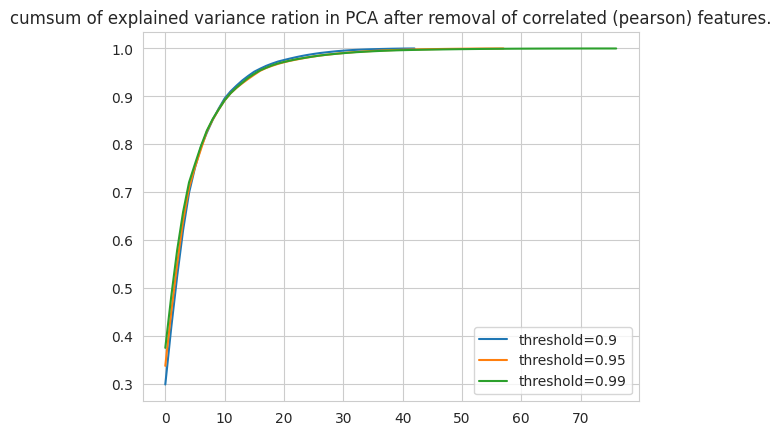

In [36]:
for threshold in [0.9, 0.95, 0.99]:
    print(f"threshold={threshold}")
    features_scaled_uncor = remove_highly_correlated_features(features_scaled, threshold=threshold, method="pearson")
    print(f"Removed N={len(features.columns)-len(features_scaled_uncor.columns)} features: ")
    pca = PCA()
    pca.fit(features_scaled_uncor)
    explained_ration_cumsum = pca.explained_variance_ratio_.cumsum()
    plt.plot(explained_ration_cumsum, label=f"threshold={threshold}")
    plt.legend()
    plt.title("cumsum of explained variance ration in PCA after removal of correlated (pearson) features.")
    for i, x in enumerate(explained_ration_cumsum):
        if x >= 0.99:
            print(i, x)
            break


We might hope that after removal of the "colinear" features with threshold 0.95 the information content is the same.  